In [28]:
import pandas as pd

In [29]:
df = pd.read_csv('iris.csv')

In [30]:
import numpy as np

class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Exercise 1:
Extract only the features of sepal length and petal length (feature column 0 and 2). Choose the last 100 samples from the 150 sample set (Versicolor and Virginica). Visualize the sample distribution in the two dimentional feature space. Use blue color to mark Versicolor, and green for Virginica.

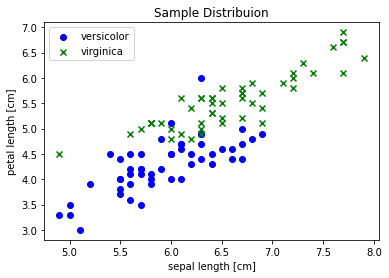

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[50:150,4].values
y = np.where(y == 'Iris-versicolor', -1, 1)
X = df.iloc[0:150, [0, 2]].values

plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='o', label='versicolor')
plt.scatter(X[100:150, 0], X[100:150, 1],
            color='green', marker='x', label='virginica')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.title('Sample Distribuion')

plt.show()

Exercise 2:
Use the perceptron model to classifiy this sample set. Set eta = 0.1 and use 10 epochs. Plot the misclassification errors versus the number of 10 epochs.

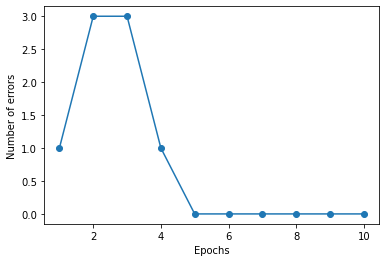

In [32]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')

plt.show()

Exercise 3:
Plot the misclassification errors versus the number of 100 epochs. Does the traning converge if we increase the epoch to 100? Can you explain why?

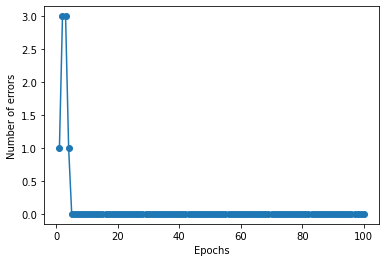

In [33]:
ppn = Perceptron(eta=0.1, n_iter=100)

ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')

plt.show()

Yes, the training set converge when we increase the epoch to 100 because normally when we increase the epochs the observations will be so closely similar and it becomes over fitted data. When this happens we need to find the accuracy of data for each epoch so the memorized data wont be repeated again.